# Project 8 -- Rafee Adnan

**TA Help:** John Smith, Alice Jones
    
**Collaboration:** Friend1, Friend2


## Question 1

In [3]:
options(repr.matrix.max.cols=25, repr.matrix.max.rows=200)

In [4]:
options(jupyter.rich_display = F)

In [5]:
library(data.table)

In [6]:
titles <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/titles.csv"))

In [7]:
episodes <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/episodes.csv"))

In [8]:
people <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/people.csv"))

In [9]:
ratings <- data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/ratings.csv"))

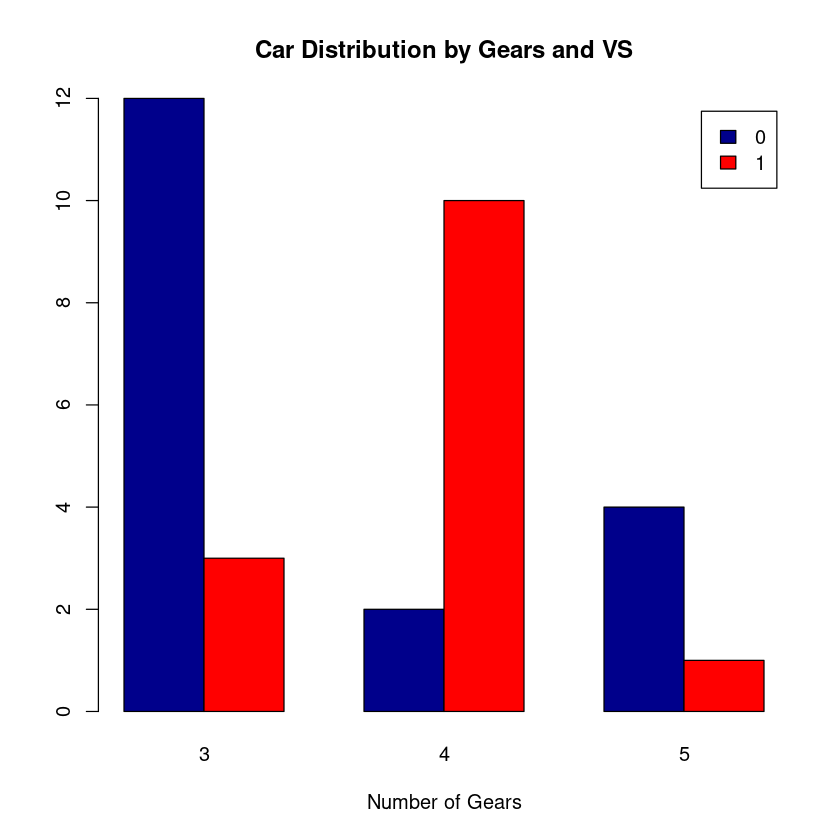

In [10]:
counts <- table(mtcars$vs, mtcars$gear)
barplot(counts, main="Car Distribution by Gears and VS",
  xlab="Number of Gears", col=c("darkblue","red"),
  legend = rownames(counts), beside=TRUE)

In [11]:
str(titles)

'data.frame':	8064259 obs. of  9 variables:
 $ title_id       : chr  "tt0000001" "tt0000002" "tt0000003" "tt0000004" ...
 $ type           : chr  "short" "short" "short" "short" ...
 $ primary_title  : chr  "Carmencita" "Le clown et ses chiens" "Pauvre Pierrot" "Un bon bock" ...
 $ original_title : chr  "Carmencita" "Le clown et ses chiens" "Pauvre Pierrot" "Un bon bock" ...
 $ is_adult       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ premiered      : int  1894 1892 1892 1892 1893 1894 1894 1894 1894 1895 ...
 $ ended          : int  NA NA NA NA NA NA NA NA NA NA ...
 $ runtime_minutes: int  1 5 4 12 1 1 1 1 40 1 ...
 $ genres         : chr  "Documentary,Short" "Animation,Short" "Animation,Comedy,Romance" "Animation,Short" ...


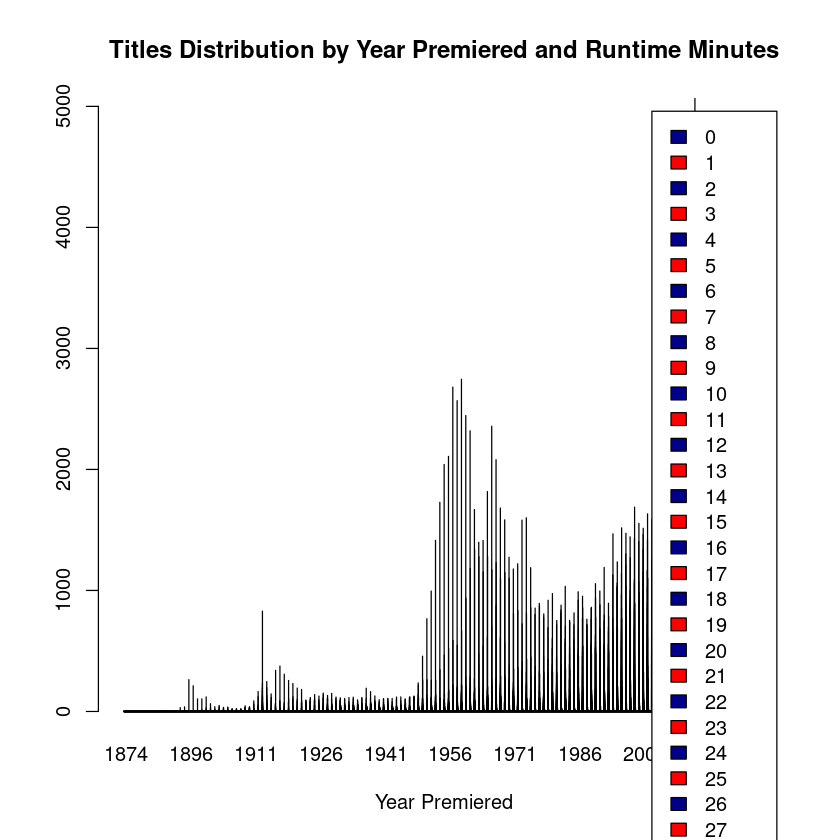

In [12]:
counts <- table(titles$runtime_minutes, titles$premiered)
barplot(counts, main="Titles Distribution by Year Premiered and Runtime Minutes",
  xlab="Year Premiered", col=c("darkblue","red"),
  legend = rownames(counts), beside=TRUE)

In [20]:
str(people)

'data.frame':	11056060 obs. of  4 variables:
 $ person_id: chr  "nm0000001" "nm0000002" "nm0000003" "nm0000004" ...
 $ name     : chr  "Fred Astaire" "Lauren Bacall" "Brigitte Bardot" "John Belushi" ...
 $ born     : int  1899 1924 1934 1949 1918 1915 1899 1924 1925 1899 ...
 $ died     : int  1987 2014 NA 1982 2007 1982 1957 2004 1984 1986 ...


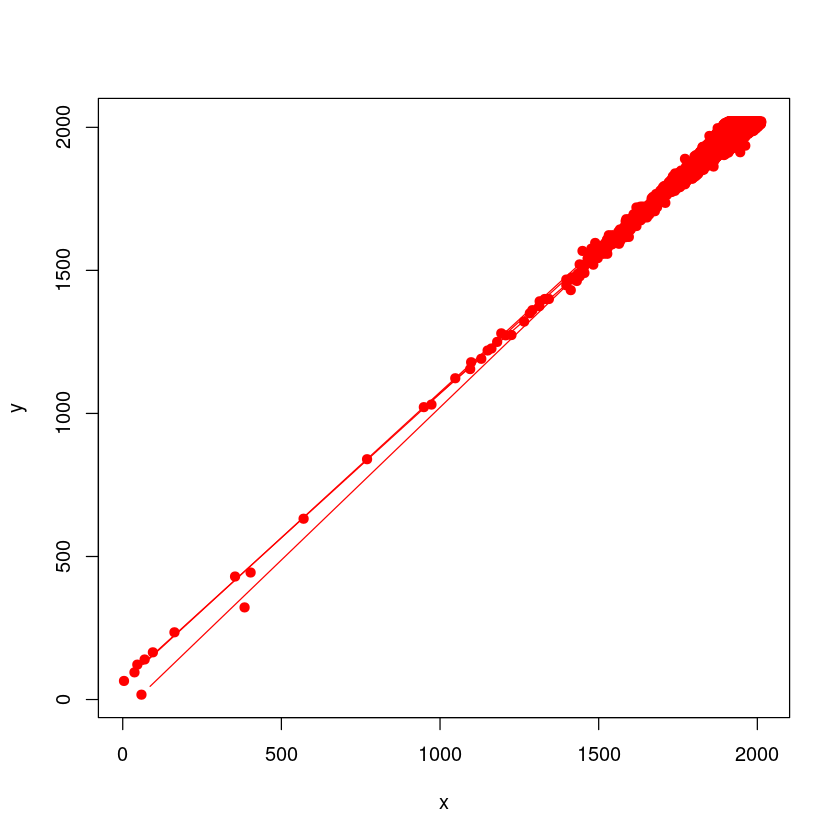

In [27]:
plot(people$born, (people$died), type = "b", pch = 19, 
     col = "red", xlab = "x", ylab = "y")

a) shown above

b) shown above

c) Graph a shows us the total time from all of the movies in the dataframe distributed among each of the years that the movies were premiered in. Graph b shows us the years at which people have been born and their respective death years.

## Question 2

In [31]:
find_movie_with_at_least_rating <- function(titles_df, ratings_df, ratings_of_at_least) {
    results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id")
    popular_movie_results <- results[results$type == "movie" & results$rating >= ratings_of_at_least, ]
    return(popular_movie_results)
    }

In [32]:
myDF <- find_movie_with_at_least_rating(titles, ratings, 9.5)

In [33]:
head(myDF)

       title_id  rating votes type  primary_title            
3314   tt0012623 9.6     5    movie The Rider of the King Log
46780  tt0069699 9.6     5    movie Always a New Beginning   
56417  tt0080884 9.5     6    movie Un hombre... una ciudad  
96935  tt0134350 9.8     5    movie Busty Biker Babes        
101533 tt0143768 9.7    15    movie Nicole's Revenge         
101955 tt0144563 9.5     6    movie Racquel Untamed          
       original_title            is_adult premiered ended runtime_minutes
3314   The Rider of the King Log 0        1921      NA     NA            
46780  Always a New Beginning    0        1974      NA     90            
56417  Un hombre... una ciudad   0        1979      NA    117            
96935  Busty Biker Babes         1        1994      NA     61            
101533 Nicole's Revenge          1        1995      NA     65            
101955 Racquel Untamed           1        1990      NA     74            
       genres     
3314   \\N        
46780  Doc

In [34]:
dim(myDF)

[1] 289  11

## Question 3

find_movie_with_at_least_rating <- function(titles_df, ratings_df, ratings_of_at_least) {

1) The first line of the function defines the function name and the parameters that go in

results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id")

2) The second line of the funtion defines results as a dataframe that combines the information from both data frames for the data that has the same title_id. 

popular_movie_results <- results[results$type == "movie" & results$rating >= ratings_of_at_least, ]

3) The third line defines a popular_movie_results as a datatframe that only holds information about items in results that are both movies and have a rating higher than the rating given in the parameter. 

return(popular_movie_results)

4) returns the new dataframe

## Question 4

In [35]:
my_selection <- find_movie_with_at_least_rating(titles, ratings, 7.6)

In [38]:
str(my_selection)

'data.frame':	34340 obs. of  11 variables:
 $ title_id       : chr  "tt0001498" "tt0002305" "tt0002637" "tt0002832" ...
 $ rating         : num  7.7 7.6 7.7 7.8 7.7 8.3 7.6 8 7.6 7.6 ...
 $ votes          : int  6 17 6 10 9 6 14 6 7 5 ...
 $ type           : chr  "movie" "movie" "movie" "movie" ...
 $ primary_title  : chr  "The Battle of Trafalgar" "Life of Villa" "Arizona" "Evangeline" ...
 $ original_title : chr  "The Battle of Trafalgar" "Life of Villa" "Arizona" "Evangeline" ...
 $ is_adult       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ premiered      : int  1911 1912 1913 1914 1913 1914 1914 1914 1914 1914 ...
 $ ended          : int  NA NA NA NA NA NA NA NA NA NA ...
 $ runtime_minutes: int  51 NA NA 50 NA 60 NA 50 NA NA ...
 $ genres         : chr  "War" "Documentary,War" "Western" "Drama" ...


In [39]:
dim(my_selection)

[1] 34340    11

In [42]:
find_movie_with_lower_than_rating <- function(titles_df, ratings_df, ratings_of_at_least) {
    results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id")
    popular_movie_results <- results[results$type == "movie" & results$rating < ratings_of_at_least, ]
    return(popular_movie_results)
    }

In [43]:
dim(find_movie_with_lower_than_rating(titles, ratings, 5.0))

[1] 47203    11

a) 34,340 movies
 
b) shown above

c) 47,203 movies

## Question 5

In [47]:
most_popular_movie_in_genre <- function(titles_df, ratings_df, genre) {
    results <- merge(ratings_df, titles_df, by.x = "title_id", by.y = "title_id")
    genre_results <- results[results$type == "movie" & results$genres == genre, ]
    popular_df <- genre_results[genre_results$rating == max(genre_results$rating), ]
    return(popular_df)
}

In [49]:
most_popular_movie_in_genre(titles, ratings, "War")

        title_id  rating votes type 
1102841 tt8035236 9.4    32    movie
        primary_title                                
1102841 Letters for Annie: Memories from World War II
        original_title                                is_adult premiered ended
1102841 Letters for Annie: Memories from World War II 0        2018      NA   
        runtime_minutes genres
1102841 NA              War   

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.